In [1]:
import pandas as pd
import numpy as np
csvpath1 = "Resources/Week4-Day2-Activity7-emb_historical.csv"
csvpath2 = "Resources/Week4-Day2-Activity7-imo_historical.csv"

In [2]:
emb_df = pd.read_csv(csvpath1, index_col='Trade DATE', infer_datetime_format=True)
imo_df = pd.read_csv(csvpath2, index_col='Trade DATE', infer_datetime_format=True)

In [3]:
emb_df

,Symbol,NOCP
Trade DATE,,
5/13/2019,ENB,26.24
5/10/2019,ENB,27.96
5/9/2019,ENB,27.21
5/8/2019,ENB,27.09
5/7/2019,ENB,26.66
...,...,...
5/21/2018,ENB,12.99
5/18/2018,ENB,13.00
5/17/2018,ENB,12.82


In [16]:
imo_df


,Symbol,NOCP
Trade DATE,,
1/10/2019,IMO,35.91
1/11/2019,IMO,36.01
1/14/2019,IMO,34.67
1/15/2019,IMO,33.99
1/16/2019,IMO,33.58
...,...,...
9/28/2018,IMO,45.23
9/4/2018,IMO,51.93
9/5/2018,IMO,49.54


In [32]:
emb_df.sort_index(inplace=True)
imo_df.sort_index(inplace=True)
all_prices = pd.concat([emb_df,imo_df], axis='rows', join='inner')

In [33]:
all_prices = all_prices.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")

In [34]:
#all_prices.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol",aggfunc=np.sum)

In [35]:
all_returns = all_prices.pct_change()
all_returns.head()

Symbol,ENB,IMO
Trade DATE,,
1/10/2019,NaN,NaN
1/11/2019,0.026849,0.002785
1/14/2019,-0.001973,-0.037212
1/15/2019,0.007415,-0.019613
1/16/2019,-0.031894,-0.012062


In [36]:
enb_wg = 0.5
imo_wg = 0.5



In [37]:

portfolio_returns = enb_wg*all_returns['ENB']+imo_wg*all_returns['IMO']
portfolio_returns

Trade DATE
1/10/2019         NaN
1/11/2019    0.014817
1/14/2019   -0.019593
1/15/2019   -0.006099
1/16/2019   -0.021978
               ...   
9/28/2018   -0.023414
9/4/2018     0.028258
9/5/2018    -0.014993
9/6/2018    -0.061104
9/7/2018    -0.005910
Length: 250, dtype: float64

In [39]:
weights= [0.5, 0.5]
portfolio_returns2 = all_returns.dot(weights)

portfolio_returns2.head()


Trade DATE
1/10/2019         NaN
1/11/2019    0.014817
1/14/2019   -0.019593
1/15/2019   -0.006099
1/16/2019   -0.021978
dtype: float64

In [40]:
volatility = all_returns.std()*np.sqrt(252)
volatility


Symbol
ENB    2.778211
IMO    1.360668
dtype: float64

In [44]:
intial_investment = 10000
cumulative_returns = (1+portfolio_returns).cumprod()
cumulative_returns

Trade DATE
1/10/2019         NaN
1/11/2019    1.014817
1/14/2019    0.994934
1/15/2019    0.988865
1/16/2019    0.967132
               ...   
9/28/2018    4.357119
9/4/2018     4.480243
9/5/2018     4.413070
9/6/2018     4.143412
9/7/2018     4.118925
Length: 250, dtype: float64

In [45]:
cumulative_profit= intial_investment * cumulative_returns
cumulative_profit


Trade DATE
1/10/2019             NaN
1/11/2019    10148.168886
1/14/2019     9949.339642
1/15/2019     9888.654799
1/16/2019     9671.320040
                 ...     
9/28/2018    43571.190572
9/4/2018     44802.433149
9/5/2018     44130.700643
9/6/2018     41434.124171
9/7/2018     41189.253863
Length: 250, dtype: float64

<AxesSubplot:xlabel='Trade DATE'>

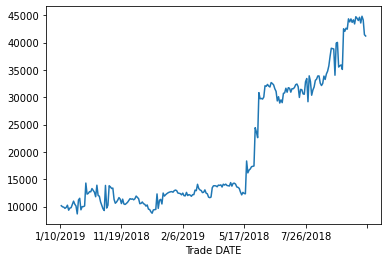

In [46]:
cumulative_profit.plot()

In [ ]:
def get_cumulative_profit(weight_array,intial_investment):
    #weights= [0.5, 0.5]
    portfolio_returns2 = all_returns.dot(weight_array)
    cumulative_profit = intial_investment * cumulative_returns
    cumulative_returns = (1+portfolio_returns).cumprod()
    intial_investment = 10000
    final_profit = cumulative_returns.iloc[-1]
    return final_profit

get_cumulative_profit(all_returns


